# WMT of tendency terms
## CM2.6
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Make histogram of each term](#first-bullet)
* [Save histograms](#second-bullet)

# 1) Make histogram of each term <a class='anchor' id='first-bullet'> </a>

In [1]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [2]:
client

<Client: 'tls://10.0.15.28:8786' processes=30 threads=60, memory=900.00 GiB>

In [114]:
cluster.close()
client.close()

In [2]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
from fastjmd95 import jmd95numba
import gcsfs
import gcm_filters
import xgcm
from typing import Annotated
import gsw

In [3]:
from intake import open_catalog

url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/GFDL_CM2.6.yaml"
cat = open_catalog(url)
ds  = cat["GFDL_CM2_6_control_ocean"].to_dask()
coord  = cat["GFDL_CM2_6_grid"].to_dask()

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
#Load in tendencies

import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [5]:
tracers = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/tracer_tendencies.zarr'))
drhodts = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/drhodts_tendencies.zarr'))
rho_cab = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/rho_lap_cab_tendencies.zarr'))

tendencies = xr.merge([tracers, drhodts, rho_cab])

In [6]:
tendencies

<xarray.Dataset>
Dimensions:    (time: 240, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time       (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * xt_ocean   (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean   (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    SSS_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    SST_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    drhods     (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    drhodt     (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    cabbeling  (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>

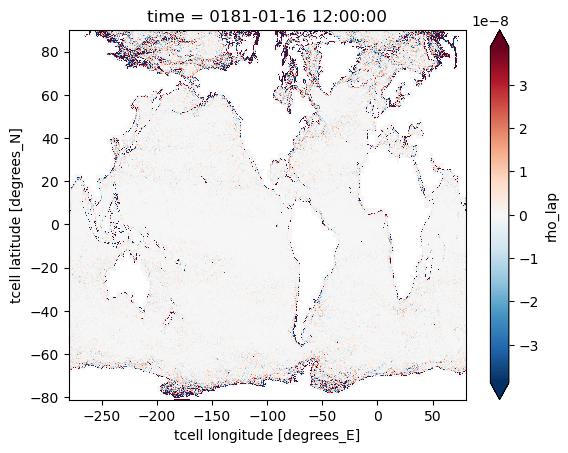

In [5]:
rho_cab.rho_lap[0].plot(robust=True)

# Create basin mask for CM2.6

In [1]:
!pip install git+https://github.com/mathause/regionmask.git

  Cloning https://github.com/mathause/regionmask.git to /tmp/pip-req-build-68hd55_s
  Running command git clone --filter=blob:none --quiet https://github.com/mathause/regionmask.git /tmp/pip-req-build-68hd55_s
  Resolved https://github.com/mathause/regionmask.git to commit 31b39e0ff6f2635ab4c92de800efb04c79a8ee24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for regionmask: filename=regionmask-0.9.0.post1.dev27+g31b39e0-py3-none-any.whl size=65494 sha256=af0ed9036c42f4185b552c7daa8ab3084cd95d5ca41605b986dd46581d81450c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fb9z50s_/wheels/1a/62/0f/f392f37f9bd2d2d61b9a6b63de17bb421b3f7c2972b03c9934
Successfully built regionmask


In [2]:
!pip install git+https://github.com/jbusecke/xmip.git

  Cloning https://github.com/jbusecke/xmip.git to /tmp/pip-req-build-_pmhin8s
  Running command git clone --filter=blob:none --quiet https://github.com/jbusecke/xmip.git /tmp/pip-req-build-_pmhin8s
  Resolved https://github.com/jbusecke/xmip.git to commit 16ce8bbe4df5ea4150f7da516eeccc6fd06131a4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached xgcm-0.6.1-py3-none-any.whl (60 kB)
  Created wheel for xmip: filename=xmip-0.7.2.dev4+g16ce8bb-py3-none-any.whl size=58752 sha256=02f9b476f2b27fcd2f69ec08d570acfbb6c5dffb7e83db20f76edbb566ea17e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkoqhlp9/wheels/14/81/1d/2382ef5c4df3bc79c5b5a3c37400af047e5a775a4b2cf79b42
Successfully built xmip
  Attempting uninstall: xgcm
    Found existing installation: xgcm 0.8.1
    Uninstalling xgcm-0.8.1:
      Successfully uninstalled xgcm-0.8.1
  Attempting uninstall: xmip
    Found existing installation: x

In [7]:
import regionmask  
from xmip.preprocessing import combined_preprocessing
from xmip.regionmask import merged_mask

<GeoAxes: >

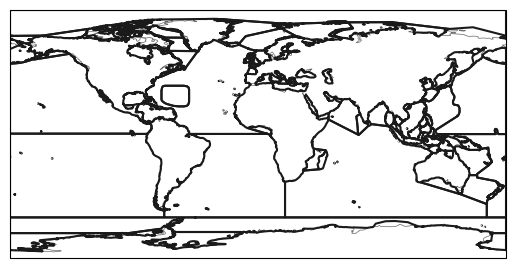

In [8]:
# load ocean basin data
basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50
basins.plot(add_ocean=False, add_label=False)

In [9]:
da = ds.temp.isel(time=0, st_ocean=0).squeeze()

In [10]:
da_renamed = da.rename({'geolat_t':'lat', 'geolon_t':'lon'}).load()

In [11]:
da_renamed

<xarray.DataArray 'temp' (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    lat       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    lon       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    st_ocean  float64 5.034
    time      object 0181-01-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Attributes:
    cell_methods:   time: mean
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

In [12]:
mask = merged_mask(basins, da_renamed)

/srv/conda/envs/notebook/lib/python3.10/site-packages/regionmask/core/mask.py:151: FutureWarning: Passing 'lon_name' and 'lat_name' is deprecated. Please pass the lon and lat coordinates direcly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [13]:
mask

<xarray.DataArray 'mask' (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lat       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    lon       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    st_ocean  float64 5.034
    time      object 0181-01-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98

In [16]:
#assign each region index value to basin name

north_atlantic_ocean = 0
south_atlantic_ocean = 1
north_pacific_ocean = 2
south_pacific_ocean = 3
south_china_seas = 4
indian_ocean = 5
arctic_ocean = 6
southern_ocean = 7
black_sea = 8
med_sea = 9
red_sea = 10
baltic_sea = 12 #no 11

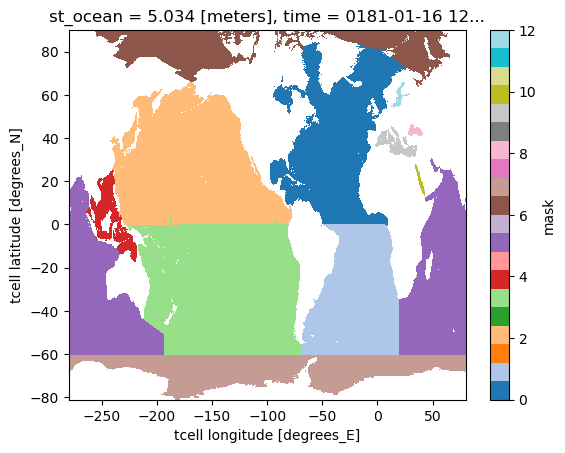

In [17]:
mask.plot(cmap='tab20');

# Make histogram of each term

In [19]:
#New ds after dthetadt*drhodt and dSdt*drhods
def new_ds(ds):
    newds = xr.merge([(ds['SST_lap']*ds['drhodt']*ds['rho']).rename('sst'),
                      (ds['SSS_lap']*ds['drhods']*ds['rho']).rename('sss'),
                       ds['rho_lap'].rename('rho'),
                       ds['cabbeling']])
    return newds

In [20]:
tend = new_ds(tendencies)

In [21]:
tend

<xarray.Dataset>
Dimensions:    (time: 240, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time       (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * xt_ocean   (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean   (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    sst        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    sss        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    cabbeling  (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>

In [15]:
rmask = mask
#mask_bins = np.arange(rmask.min()-0.5, rmask.max()+0.5)
mask_bins = np.array([-14.5, -13.5,  -1.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   
                      6.5,   7.5, 8.5,   9.5,  10.5,  11.5,  12.5])
rho = tendencies.rho
delta_rho = 0.1
rho_bins = np.arange(1015, 1035, delta_rho)

## Find most frequently occuring isopycnal

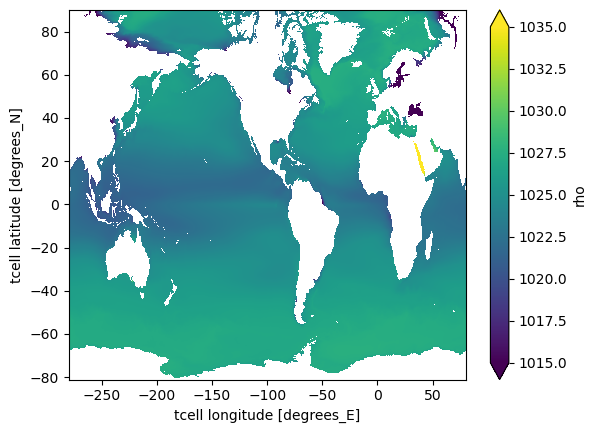

In [33]:
tendencies.rho.mean('time').plot(vmin=1015, vmax=1035);

In [16]:
from xhistogram.xarray import histogram
pdf_rho = histogram(rho, bins=[rho_bins], dim=['xt_ocean', 'yt_ocean'], density=True)

In [17]:
pdf_rho

<xarray.DataArray 'histogram_rho' (time: 240, rho_bin: 199)>
dask.array<truediv, shape=(240, 199), dtype=float64, chunksize=(1, 199), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * rho_bin  (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03 1.035e+03

In [18]:
mean_pdf_rho = pdf_rho.mean('time')

In [19]:
mean_pdf_rho

<xarray.DataArray 'histogram_rho' (rho_bin: 199)>
dask.array<mean_agg-aggregate, shape=(199,), dtype=float64, chunksize=(199,), chunktype=numpy.ndarray>
Coordinates:
  * rho_bin  (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03 1.035e+03

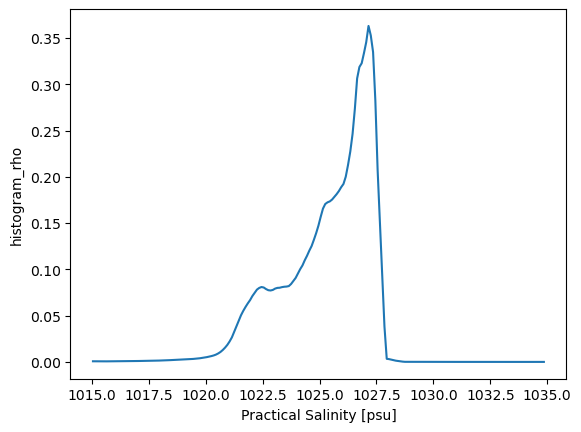

In [20]:
mean_pdf_rho.plot()

In [21]:
mean_pdf_rho.argmax().values

array(121)

In [22]:
mean_pdf_rho[121].rho_bin

<xarray.DataArray 'rho_bin' ()>
array(1027.15)
Coordinates:
    rho_bin  float64 1.027e+03
Attributes:
    cell_methods:   time: mean
    long_name:      Practical Salinity
    standard_name:  sea_water_salinity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          psu
    valid_range:    [-10.0, 100.0]

In [23]:
rho_bins[121] #1027.1 is the most frequently occurring density 

1027.1000000000026

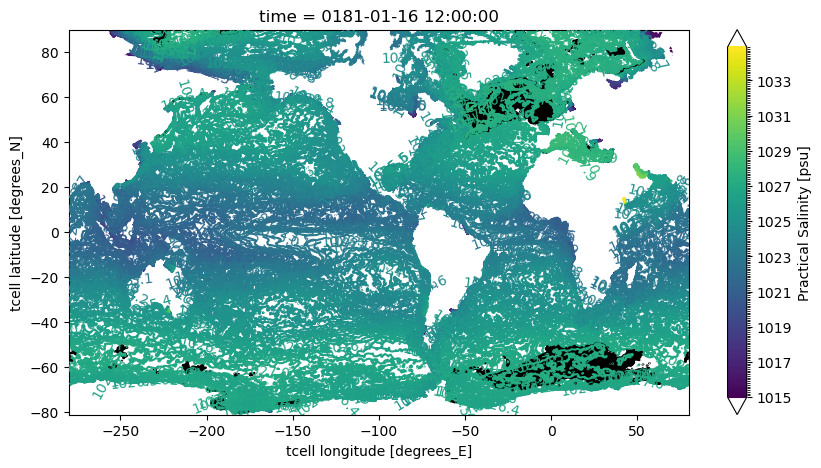

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
C = rho[0].plot.contour(levels=rho_bins, ax=ax, add_colorbar=True)
C.collections[121].set_color('k')
C.collections[121].set_linewidth(1.5)
plt.clabel(C);

In [69]:
import xesmf as xe

In [91]:
coord = coord.rename_dims({'xt_ocean':'lon', 'yt_ocean':'lat'})
renamed_coords = cesm.rename_dims({'nlon':'lon', 'nlat':'lat'})
mask = renamed_coords.REGION_MASK.reset_coords(drop=True)

In [113]:
regridder = xe.Regridder(mask, coord.wet, method='bilinear')

woa0512_pt_new_grid = regridder(woa0512_pt)
woa0512_pt_new_grid

ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

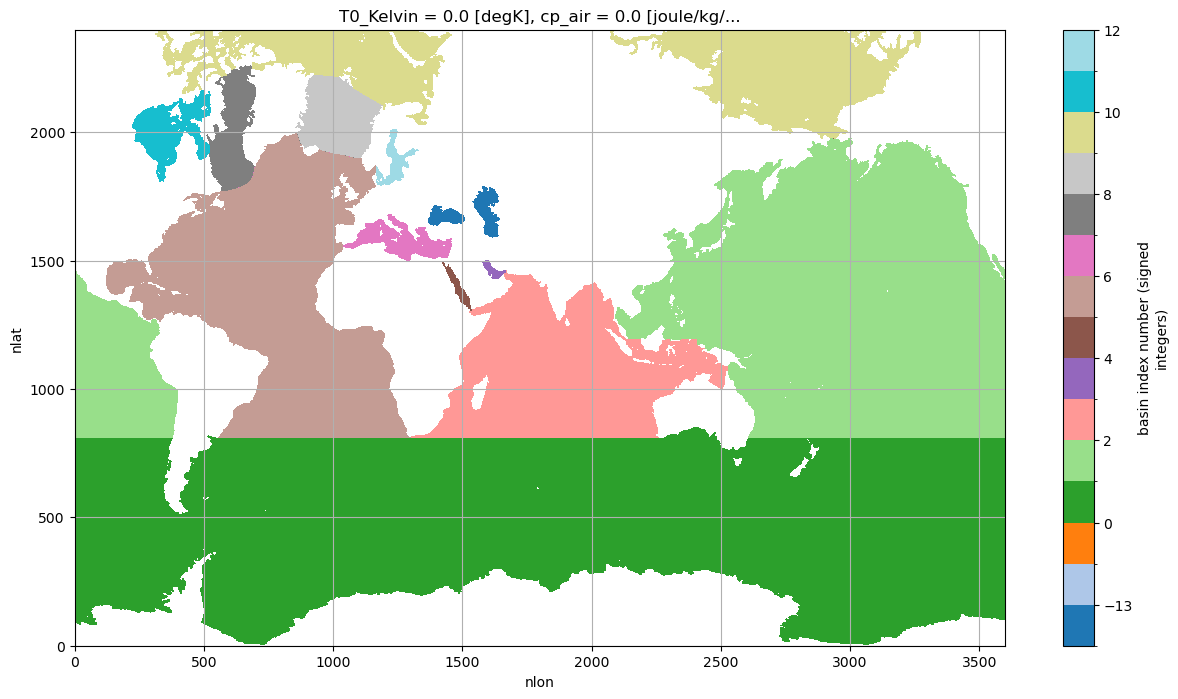

In [39]:
#to know which region index value is what basin
plt.figure(figsize=(15,8))
regions = np.unique(mask)
mask.where(cesm.KMT>0).plot.contourf(levels=regions, cmap='tab20')
plt.grid();

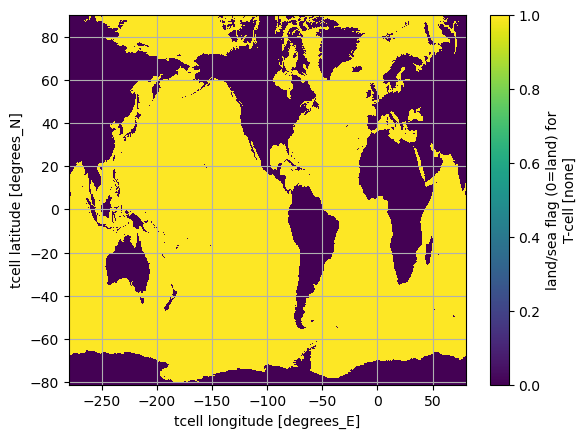

In [46]:
coord.wet.plot()
plt.grid()

In [62]:
lon_copy = coord.xt_ocean.copy()
lon_values = lon_copy.values
lon_values[:2800] *= -1
lon_rolled = np.roll(lon_values,-2800)

In [64]:
lon = xr.DataArray(data=lon_rolled, dims=lon_copy.coords)

In [67]:
coord.wet.xt_ocean

<xarray.DataArray 'xt_ocean' (xt_ocean: 3600)>
array([-279.95, -279.85, -279.75, ...,   79.75,   79.85,   79.95])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
Attributes:
    cartesian_axis:  X
    long_name:       tcell longitude
    units:           degrees_E

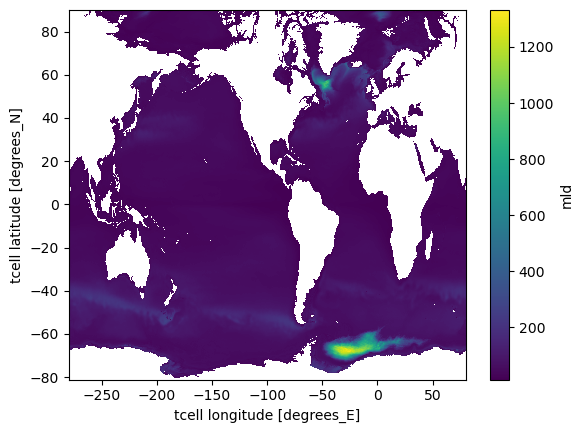

In [26]:
ds.mld.mean('time').plot();

In [30]:
avg_mld = ds.mld.mean('time').compute()
weights = coord.area_t*avg_mld

In [39]:
def histogram_func(variable, slicing=None, atl_pac=True):
    """Generalized xhistogram's histogram function 
        applied to sliced basin-wide WMT terms"""
    
    if slicing==None:
        hist = histogram(rho, mask.rename('basin_mask'), bins=[rho_bins, mask_bins],
                     weights=(variable.fillna(0.)*weights), dim=['nlon', 'nlat']) / delta_rho
    elif slicing=='north':
        if atl_pac==True:
            hist = histogram(rho.where(atl_mask).isel(nlat=slice(1200, None)),
                         bins=[rho_bins],
                         weights=(variable.fillna(0.)*weights).where(atl_mask).isel(nlat=slice(1200, None)), 
                         dim=['nlon', 'nlat']) / delta_rho
        else:
            hist = histogram(rho.where(mask==pacific_ocean).isel(nlat=slice(1200, None)), 
                         bins=[rho_bins],
                         weights=(variable.fillna(0.)*weights).where(mask==pacific_ocean).isel(nlat=slice(1200, None)), 
                         dim=['nlon', 'nlat']) / delta_rho
    elif slicing=='south':
        if atl_pac==True:
            hist = histogram(rho.where(atl_mask).isel(nlat=slice(None, 1200)), 
                             mask.where(mask==atlantic_ocean).isel(nlat=slice(None, 1200)), 
                         bins=[rho_bins, mask_bins],
                         weights=(variable.fillna(0.)*weights).where(atl_mask).isel(nlat=slice(None, 1200)), 
                         dim=['nlon', 'nlat']) / delta_rho
        else:
            hist = histogram(rho.where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                                 mask.where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                         bins=[rho_bins, mask_bins],
                         weights=(variable.fillna(0.)*weights).where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                         dim=['nlon', 'nlat']) / delta_rho
    return hist

In [21]:
all_tendencies = list(tend)

In [22]:
hists = xr.merge([histogram_func(tend[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])

In [40]:
natl_hist = xr.merge([histogram_func(tend[var], 'north', atl_pac=True).rename('OMEGA_' + var)
                      for var in all_tendencies])
npac_hist = xr.merge([histogram_func(tend[var], 'north', atl_pac=False).rename('OMEGA_' + var)
                      for var in all_tendencies])

In [25]:
hists

<xarray.Dataset>
Dimensions:          (time: 14965, rho_bin: 199, basin_mask_bin: 15)
Coordinates:
  * time             (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
  * rho_bin          (rho_bin) float64 15.05 15.15 15.25 ... 34.65 34.75 34.85
  * basin_mask_bin   (basin_mask_bin) float64 -14.0 -7.5 -0.5 ... 10.0 11.0 12.0
Data variables:
    OMEGA_sst        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 15), meta=np.ndarray>
    OMEGA_sss        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 15), meta=np.ndarray>
    OMEGA_rho        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 15), meta=np.ndarray>
    OMEGA_cabbeling  (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 15), meta=np.ndarray>

In [11]:
np.unique(ds.REGION_MASK)

array([-14., -13.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.])

In [47]:
#mask indices are ok since the major basins are all positive
hists.basin_mask_bin

<xarray.DataArray 'basin_mask_bin' (basin_mask_bin: 15)>
array([-14. ,  -7.5,  -0.5,   1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,
         8. ,   9. ,  10. ,  11. ,  12. ])
Coordinates:
  * basin_mask_bin  (basin_mask_bin) float64 -14.0 -7.5 -0.5 ... 10.0 11.0 12.0
Attributes:
    long_name:  basin index number (signed integers)

In [46]:
hists.sel(basin_mask_bin=southern_ocean)

<xarray.Dataset>
Dimensions:          (time: 14965, rho_bin: 199)
Coordinates:
  * time             (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:00:00
  * rho_bin          (rho_bin) float64 15.05 15.15 15.25 ... 34.65 34.75 34.85
    basin_mask_bin   float64 1.0
Data variables:
    OMEGA_sst        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_sss        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_rho        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_cabbeling  (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>

In [50]:
natl = natl_hist
npac = npac_hist
south = hists.sel(basin_mask_bin=southern_ocean)
ind = hists.sel(basin_mask_bin=indian_ocean)
arc = hists.sel(basin_mask_bin=arctic_ocean)

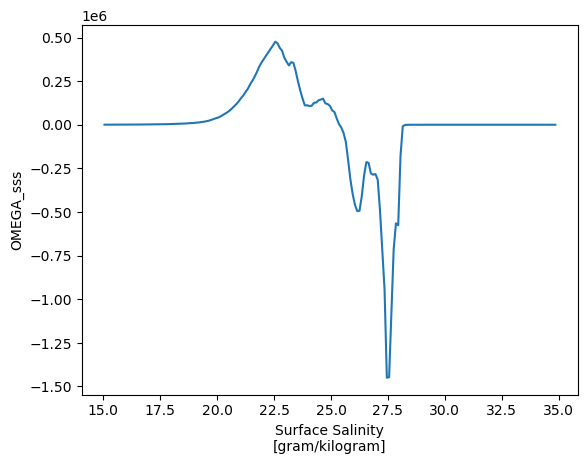

In [53]:
natl.OMEGA_sss.mean('time').plot()

# END

# Split the tendencies by basin

In [9]:
all_tendencies = list(tendencies)

In [10]:
def basin_selection(tend_term, basin):
    tendency_in_basin = tend_term.where(ds.REGION_MASK==basin)
    return tendency_in_basin

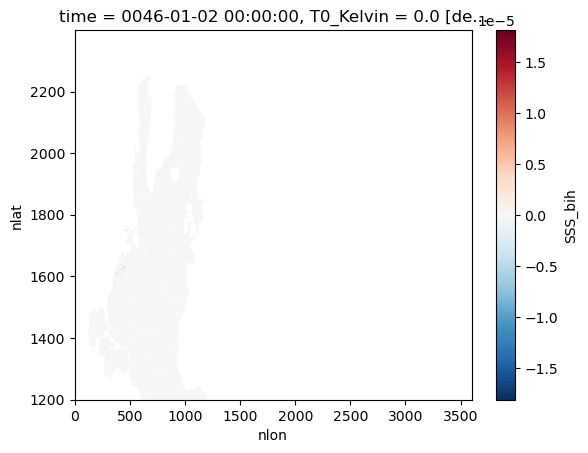

In [11]:
tendencies.SSS_bih.where(atl_mask).isel(nlat=slice(1200, None))[0].plot()

In [11]:
#Atlantic Ocean - going to add 'NATL' prefix after adding natl_ocean+nor_sea+lab_sea respective vars
natl_ocean = xr.merge([tendencies[var].where(atl_mask).isel(nlat=slice(1200, None)
                                                          ).rename('NATL_' + var) for var in all_tendencies])
satl_ocean = xr.merge([basin_selection(tendencies[var], 
                                      atlantic_ocean).isel(nlat=slice(None, 1200)
                                                          ).rename('SATL_' + var) for var in all_tendencies])

#Pacific Ocean
npac_ocean = xr.merge([basin_selection(tendencies[var], 
                                       pacific_ocean).isel(nlat=slice(1200, None)
                                                          ).rename('NPAC_' + var) for var in all_tendencies])
spac_ocean = xr.merge([basin_selection(tendencies[var], 
                                       pacific_ocean).isel(nlat=slice(None, 1200)
                                                          ).rename('SPAC_' + var) for var in all_tendencies])

#Indian Ocean
ind_ocean = xr.merge([basin_selection(tendencies[var], indian_ocean).rename('IND_' + var) for var in all_tendencies])

#Arctic Ocean
arc_ocean = xr.merge([basin_selection(tendencies[var], arctic_ocean).rename('ARC_' + var) for var in all_tendencies])

#Southern Ocean
south_ocean = xr.merge([basin_selection(tendencies[var], 
                                        southern_ocean).rename('South_' + var) for var in all_tendencies])

In [12]:
natl_ocean

<xarray.Dataset>
Dimensions:             (nlat: 1200, nlon: 3600, time: 14965)
Coordinates: (12/54)
  * nlat                (nlat) int64 1200 1201 1202 1203 ... 2396 2397 2398 2399
  * nlon                (nlon) int64 0 1 2 3 4 5 ... 3595 3596 3597 3598 3599
  * time                (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:0...
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(1200, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(1200, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(1200, 3600), meta=np.ndarray>
    ...                  ...
    salt_to_ppt         float64 0.0
    sea_ice_salinity    float64 0.0
    sflux_factor        float64 0.0
    sound               float64 0.0
    stefan_boltzmann    float64 0.0
    vonkar              float64 0.0
Data variables:
    NATL_SSS_bih        (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    NATL_SST_bih        (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    NATL_drhods         (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    NATL_drhodt         (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    NATL_cabbeling      (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>
    NATL_rho_bih        (time, nlat, nlon) float32 dask.array<chunksize=(1, 1200, 3600), meta=np.ndarray>

# Plot tendencies by basin

In [12]:
#New ds after dthetadt*drhodt and dSdt*drhods
def new_ds(ds, prefix):
    newds = xr.merge([(ds[prefix+'SST_bih']*ds[prefix+'drhodt']).rename(prefix+'sst'),
                      (ds[prefix+'SSS_bih']*ds[prefix+'drhods']).rename(prefix+'sss'),
                       ds[prefix+'rho_bih'].rename(prefix+'rho'),
                       ds[prefix+'cabbeling'].rename(prefix+'cabbeling')])
    return newds

In [13]:
natl_tend = new_ds(natl_ocean, 'NATL_')
satl_tend = new_ds(satl_ocean, 'SATL_')

npac_tend = new_ds(npac_ocean, 'NPAC_')
spac_tend = new_ds(spac_ocean, 'SPAC_')

ind_tend = new_ds(ind_ocean, 'IND_')

arc_tend = new_ds(arc_ocean, 'ARC_')

south_tend = new_ds(south_ocean, 'South_')

In [14]:
natl_tendencies = list(natl_tend)
satl_tendencies = list(satl_tend)
npac_tendencies = list(npac_tend)
spac_tendencies = list(spac_tend)
ind_tendencies = list(ind_tend)
arc_tendencies = list(arc_tend)
south_tendencies = list(south_tend)

## North Atlantic

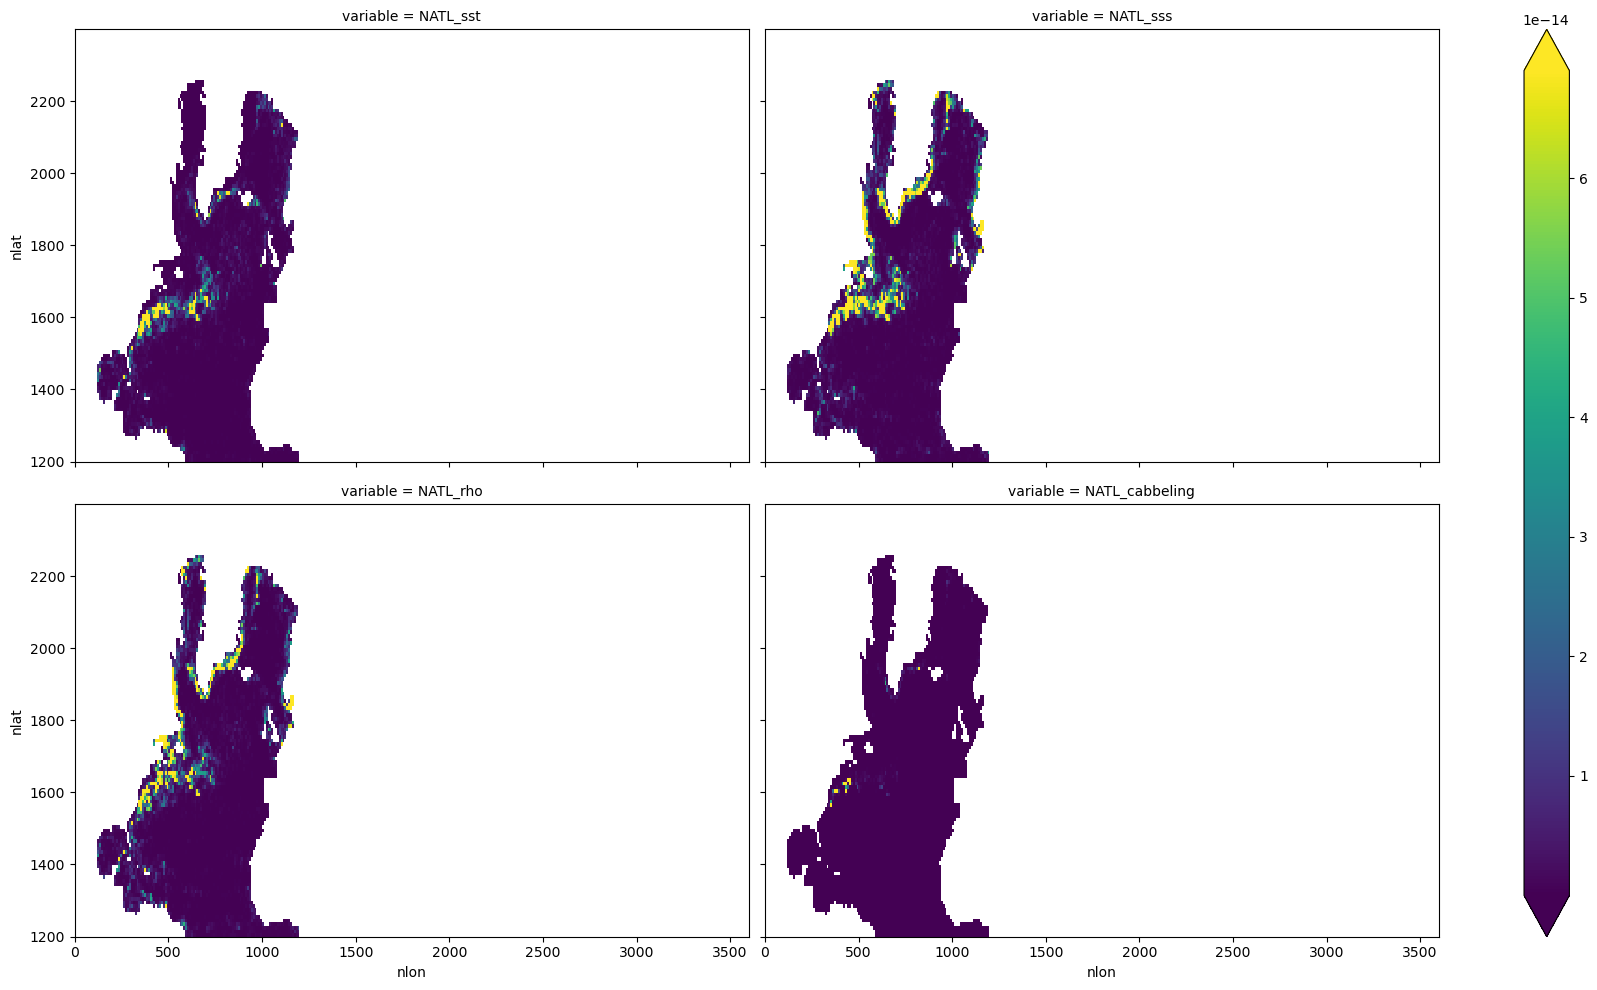

In [19]:
(natl_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## South Atlantic

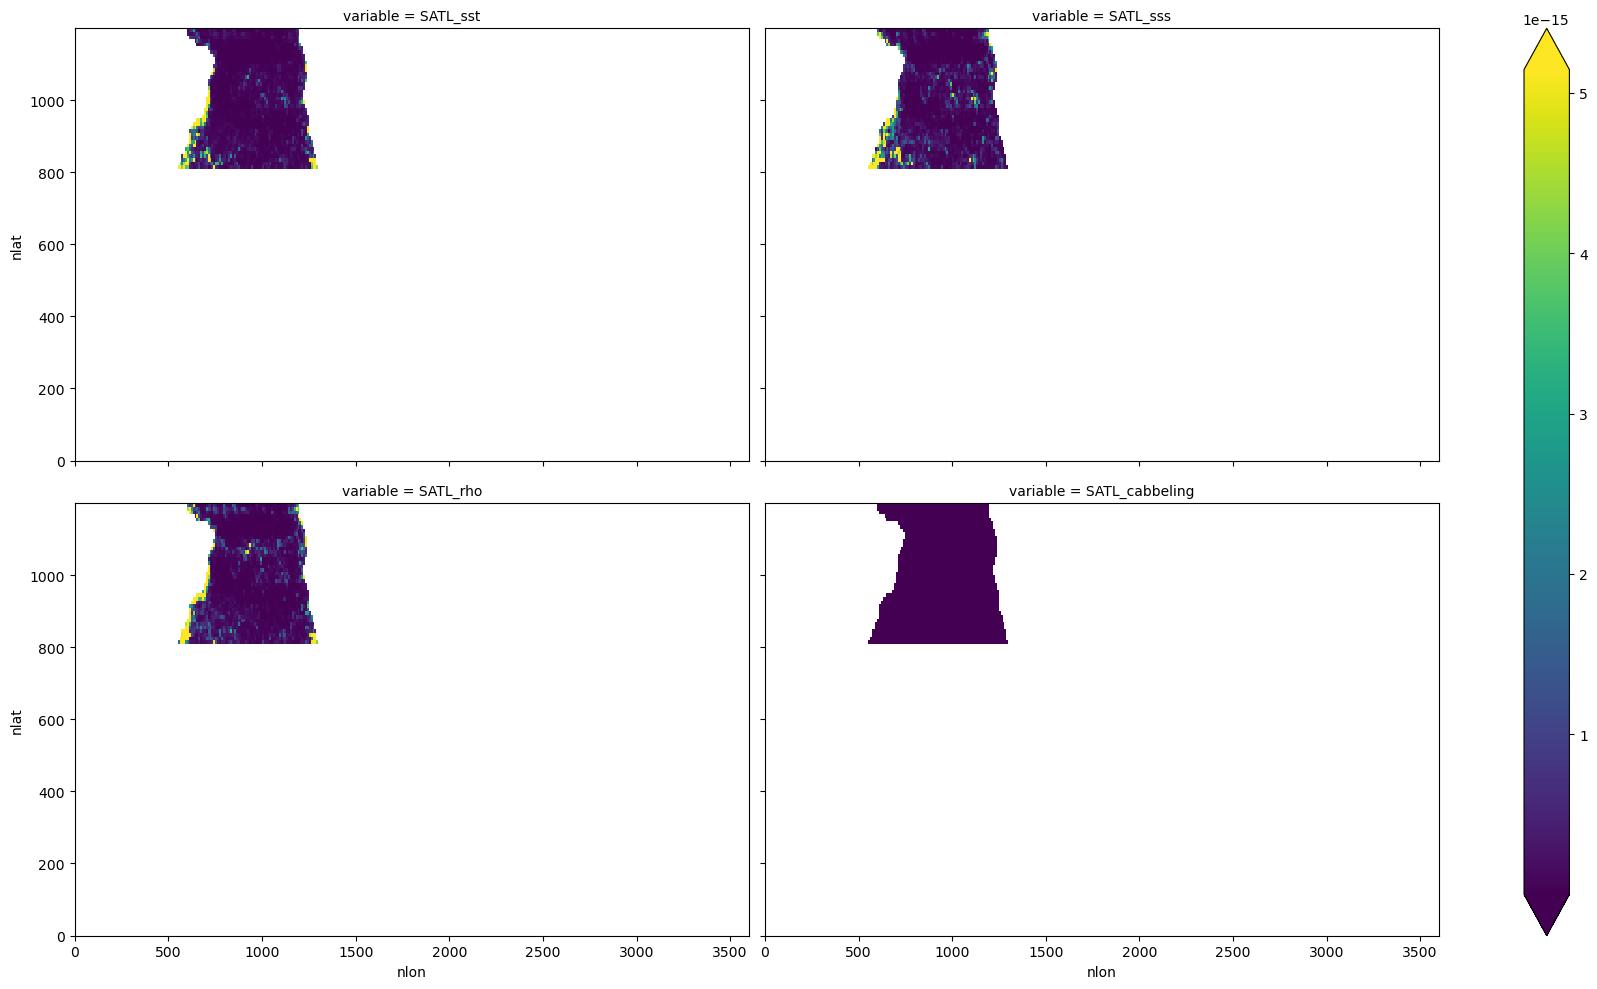

In [20]:
(satl_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## North Pacific

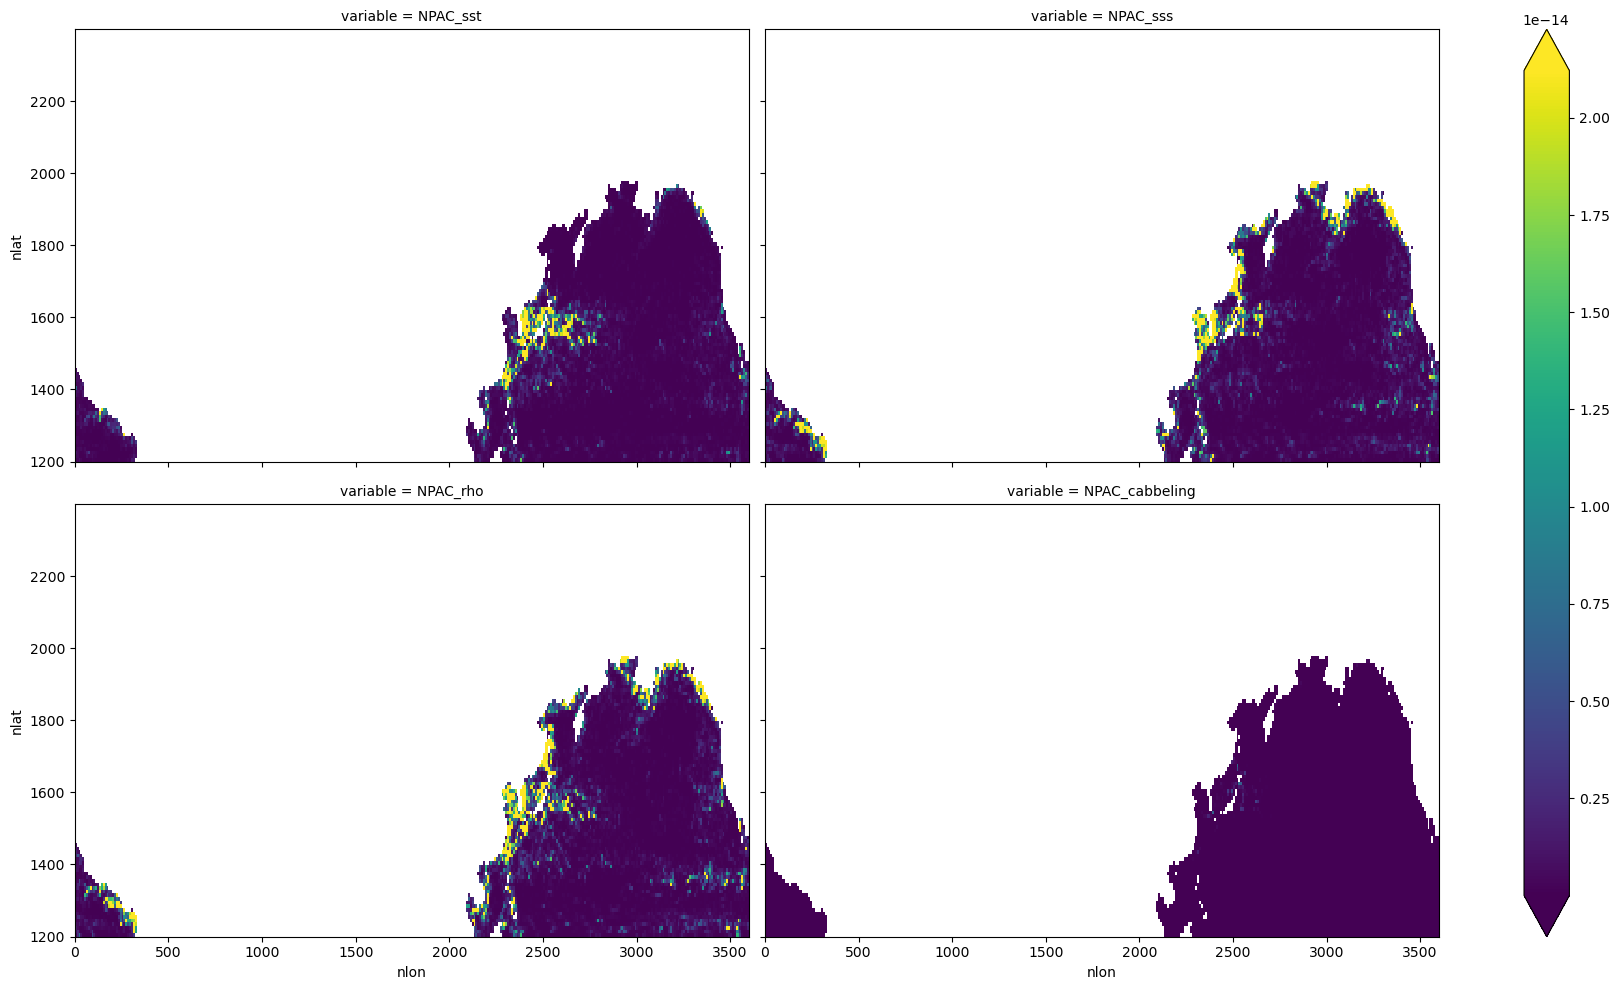

In [21]:
(npac_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## South Pacific

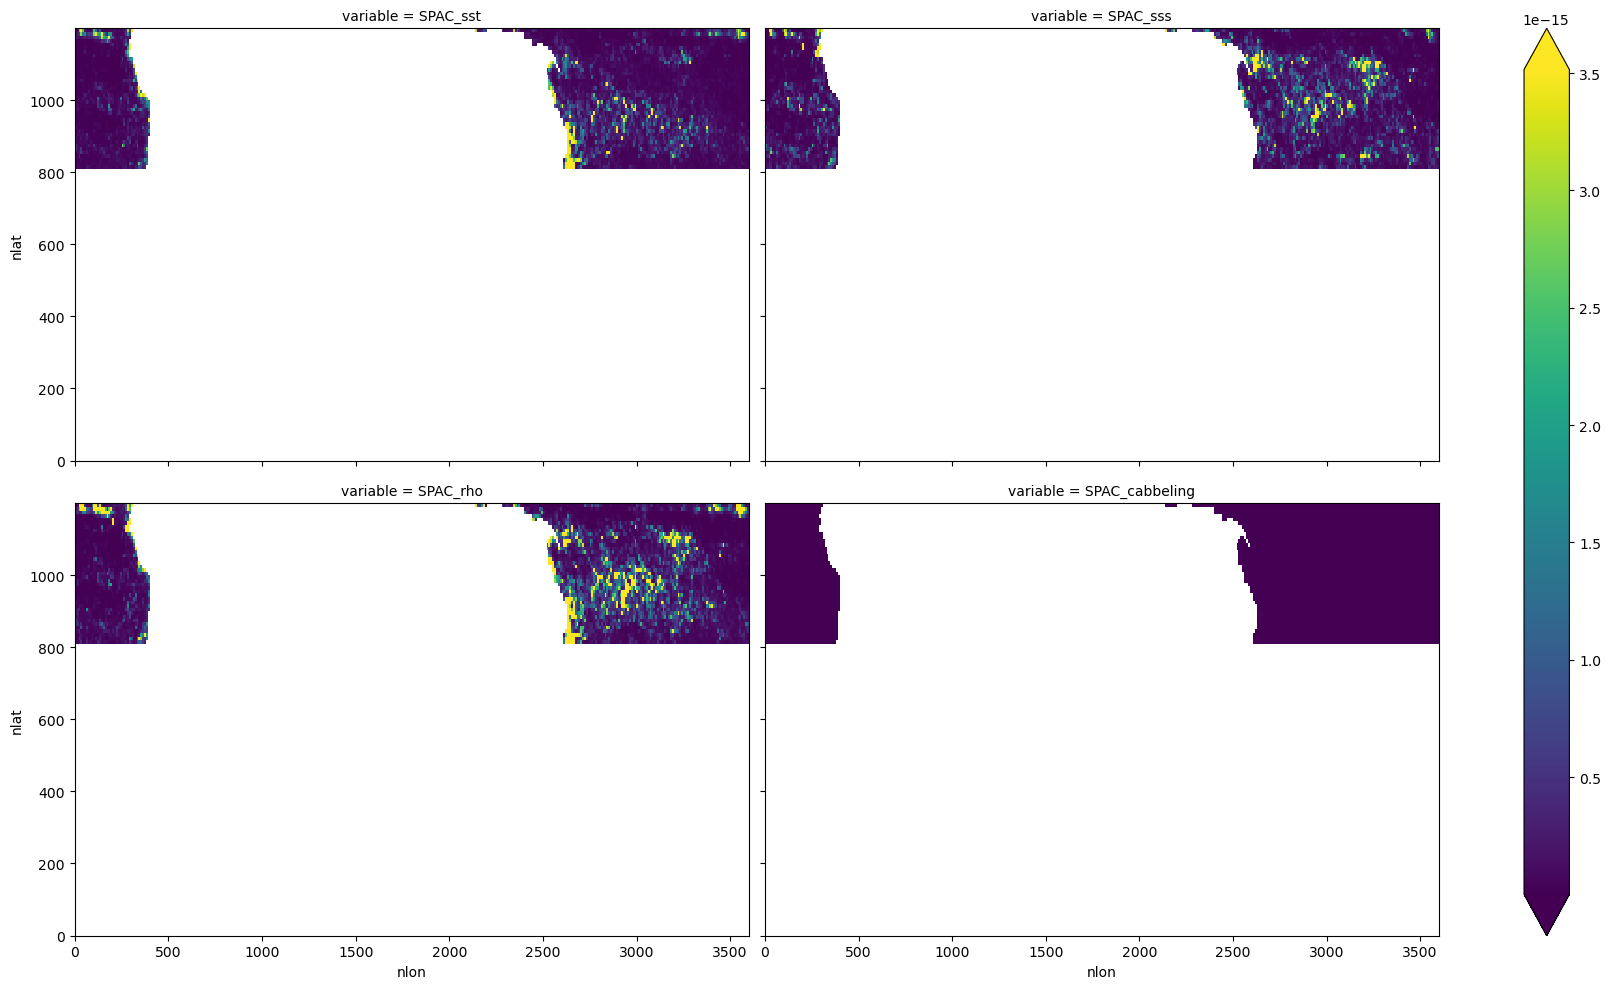

In [22]:
(spac_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## Indian

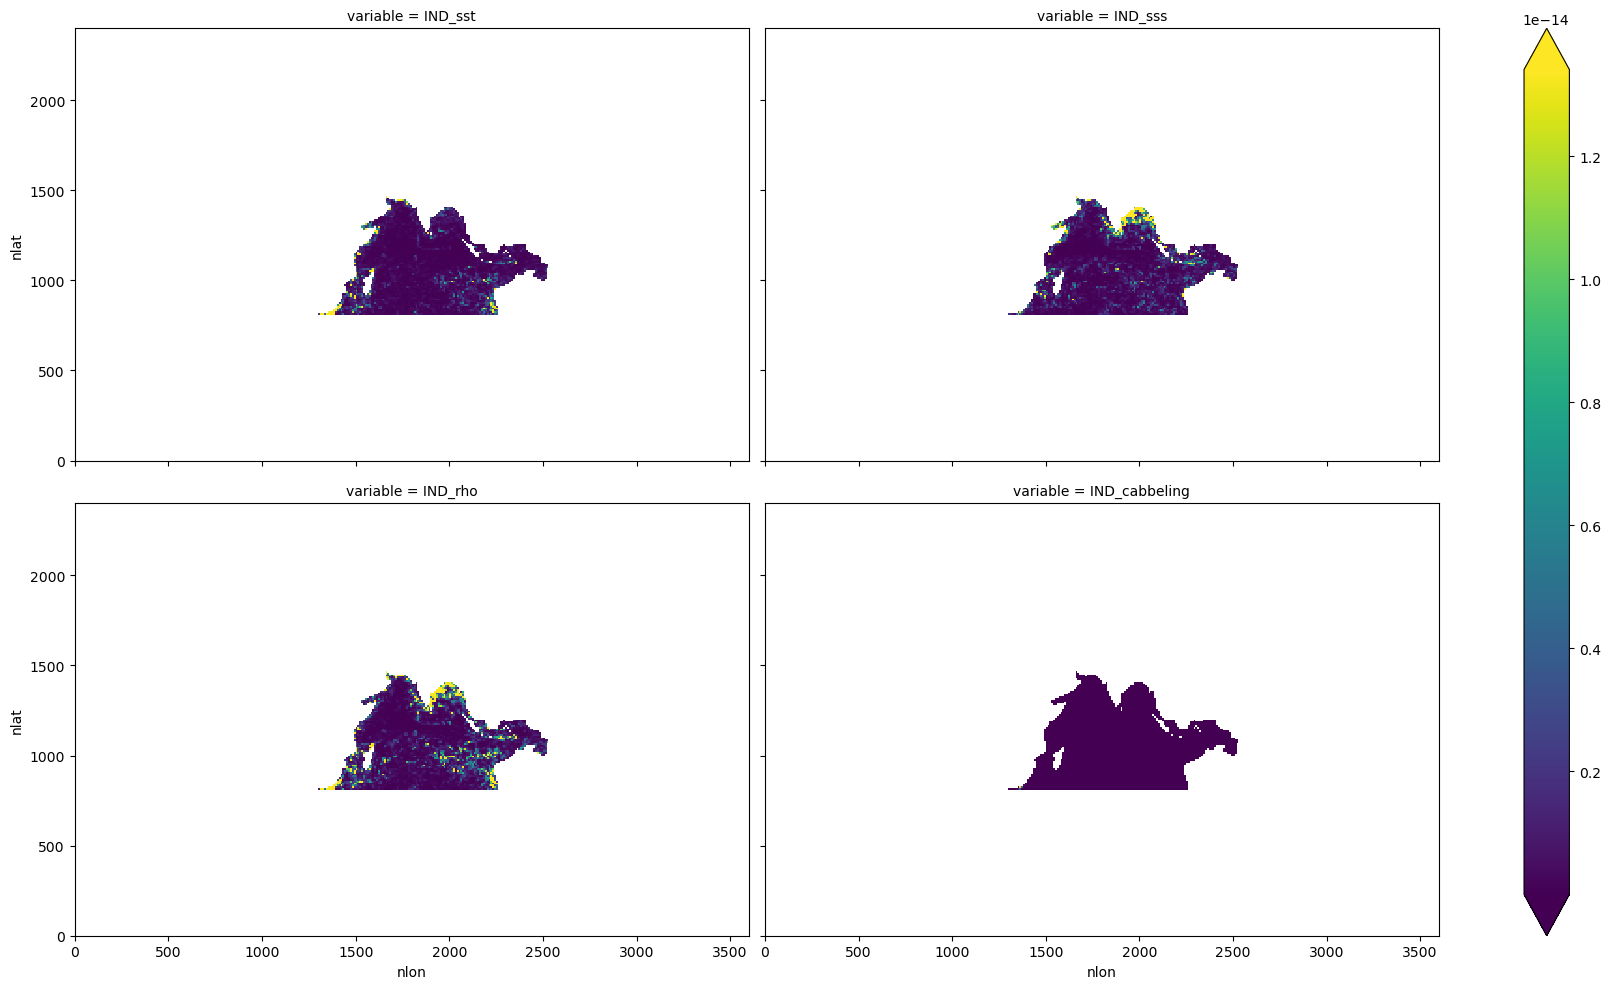

In [23]:
(ind_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## Arctic

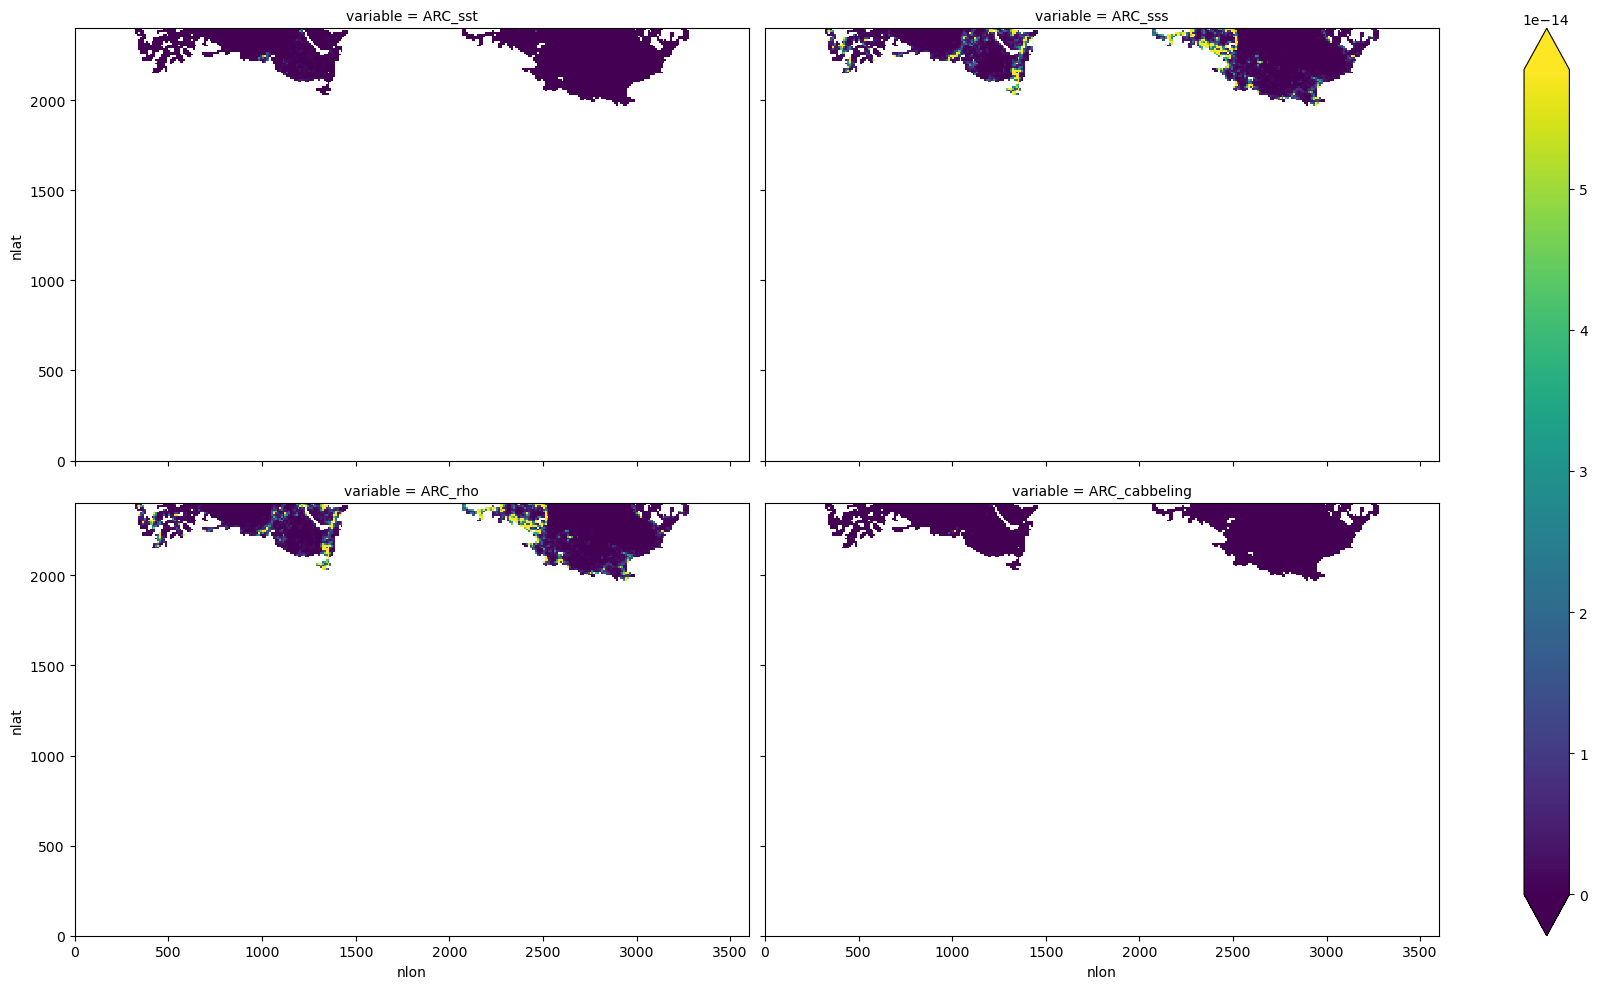

In [24]:
(arc_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## Southern

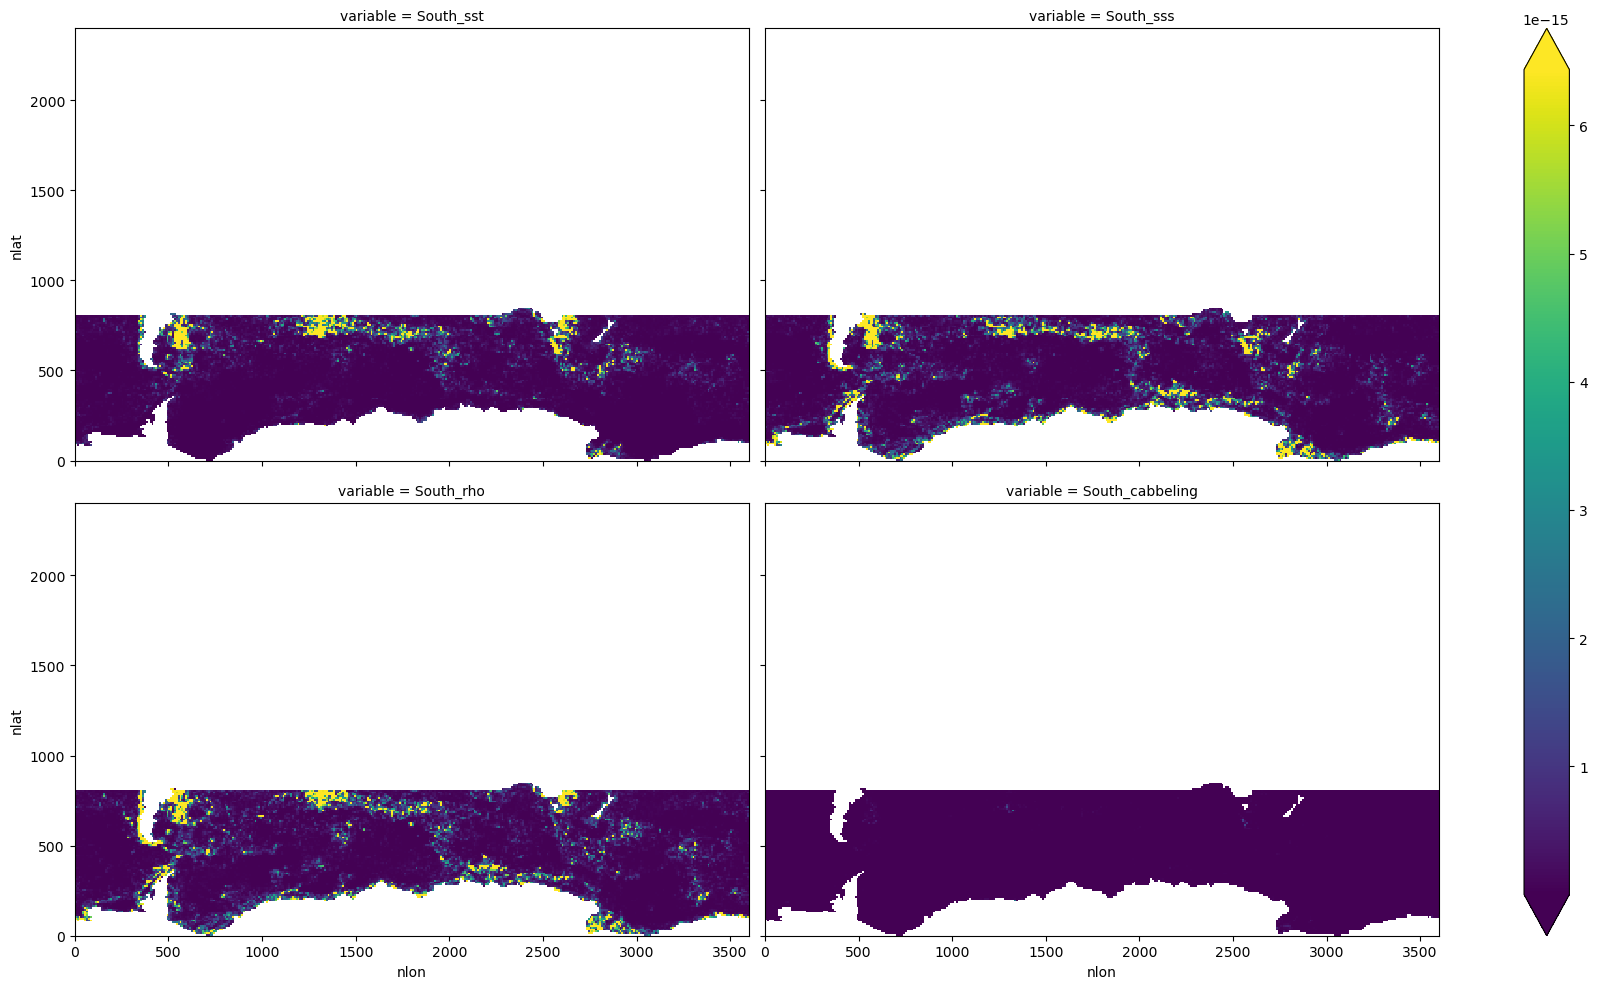

In [25]:
(south_tend.isel(time=0)**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(18, 10))

## Compute histogram by basin

In [52]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()

# set the options programatically, or through their HTML repr
options.worker_memory = 30  # 10 GB of memory per worker.

# Create a cluster with those options
cluster = gateway.new_cluster(options)
cluster.scale(30)
client = cluster.get_client()

In [53]:
client

<Client: 'tls://10.0.15.6:8786' processes=0 threads=0, memory=0 B>

In [125]:
cluster.close()
client.close()

In [17]:
rho = fastjmd95.rho(ds.SSS, ds.SST, 0)
#rho = rho_unsliced.isel(time=slice(0,182))

In [18]:
#area = ds.TAREA * ds.dz * 1e-4 #convert cm^2 to m^2
delta_rho = 0.01
rho_bins = np.arange(1015, 1030, delta_rho)

Text(0.5, 1.0, 'Avg MLD in meters')

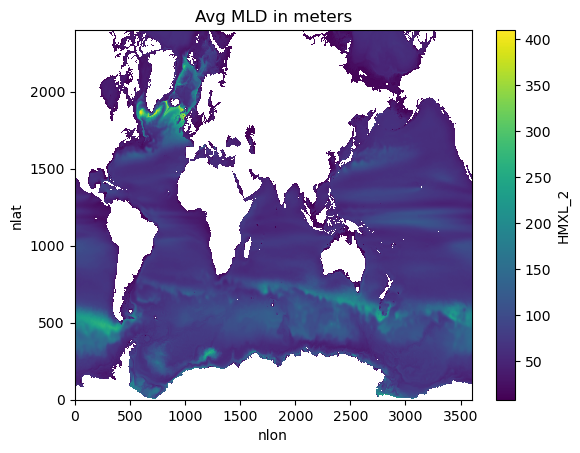

In [21]:
avg_mld = (ds.HMXL_2*1e-2).mean('time').compute()
avg_mld.plot()
plt.title('Avg MLD in meters')

In [22]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for mixing tendency terms"""
    avg_mld
    cm2_to_m2 = 1e-4
    hist = histogram(rho.rename('rho0'), bins=[rho_bins],
                     weights=(variable.fillna(0.)*(ds.TAREA*cm2_to_m2)*avg_mld), dim=['nlon', 'nlat'])
    return hist / delta_rho

In [23]:
def histogram_func_north_south(variable, slicing=None):
    """Generalized xhistogram's histogram function 
    for mixing tendency terms"""
    avg_mld
    cm2_to_m2 = 1e-4
    if slicing=='north':
        hist = histogram(rho.isel(nlat=slice(1200, None)).rename('rho0'), bins=[rho_bins],
                         weights=(variable.fillna(0.)*(ds.TAREA*cm2_to_m2*avg_mld).isel(nlat=slice(1200, None))), 
                         dim=['nlon', 'nlat']) / delta_rho
    elif slicing=='south':
        hist = histogram(rho.isel(nlat=slice(None, 1200)).rename('rho0'), bins=[rho_bins],
                         weights=(variable.fillna(0.)*(ds.TAREA*cm2_to_m2*avg_mld).isel(nlat=slice(None, 1200))), 
                         dim=['nlon', 'nlat']) / delta_rho
    return hist

In [24]:
natl_histograms = xr.merge([histogram_func_north_south(natl_tend[var], 'north').rename('OMEGA_' + var)
                      for var in natl_tendencies])
satl_histograms = xr.merge([histogram_func_north_south(satl_tend[var], 'south').rename('OMEGA_' + var)
                      for var in satl_tendencies])

In [25]:
npac_histograms = xr.merge([histogram_func_north_south(npac_tend[var], 'north').rename('OMEGA_' + var)
                      for var in npac_tendencies])
spac_histograms = xr.merge([histogram_func_north_south(spac_tend[var], 'south').rename('OMEGA_' + var)
                      for var in spac_tendencies])

In [26]:
ind_histograms = xr.merge([histogram_func(ind_tend[var]).rename('OMEGA_' + var)
                      for var in ind_tendencies])
arc_histograms = xr.merge([histogram_func(arc_tend[var]).rename('OMEGA_' + var)
                      for var in arc_tendencies])
south_histograms = xr.merge([histogram_func(south_tend[var]).rename('OMEGA_' + var)
                      for var in south_tendencies])

# 2) Save histograms <a class='anchor' id='second-bullet'> </a>

In [27]:
client.restart()

<Client: 'tls://10.2.23.2:8786' processes=18 threads=36, memory=540.00 GiB>

In [28]:
import dask, distributed
dask.config.get('distributed.scheduler.worker-saturation')

1.1

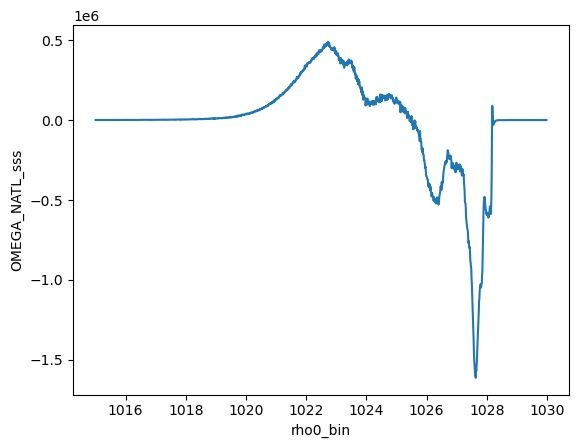

In [46]:
#visual check to see if magnitude is reasonable
natl_histograms.OMEGA_NATL_sss.mean('time').plot()

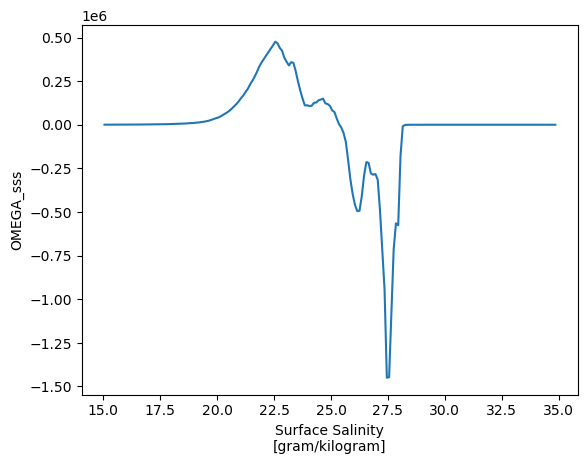

In [53]:
natl.OMEGA_sss.mean('time').plot()

# FIGS Start

In [54]:
def ann_mean2(ds):
    fig = plt.figure(figsize=(12,5))
    line_colors=['blue', 'k', 
                 'orange', 'green']#, 'purple', 'yellow'] #order of cab, rho, sss, sst, surf heat, surf salt
    for (i,j) in zip(list(ds.data_vars), line_colors):
        (ds[i].mean('time')/1e6).plot(label=f'{i}', color=j)
    plt.legend()
    plt.ylabel(r'Transformation (Sv)', fontsize=16)
    plt.grid()
    plt.title('Annual Mean Transformation Terms', fontsize=20);

In [57]:
#for the datasets from efficient histogram section
def ann_mean2(ds):
    fig = plt.figure(figsize=(12,5))
    line_colors=['green', 'orange', 
                 'k', 'blue']#, 'purple', 'yellow'] #order of sst, sss, rho, cab, surf heat, surf salt
    for (i,j) in zip(list(ds.data_vars), line_colors):
        (ds[i].mean('time')/1e6).plot(label=f'{i}', color=j)
    plt.legend()
    plt.ylabel(r'Transformation (Sv)', fontsize=16)
    plt.grid()
    plt.title('Annual Mean Transformation Terms', fontsize=20);

In [40]:
client.restart()

<Client: 'tls://10.2.76.2:8786' processes=5 threads=10, memory=150.00 GiB>

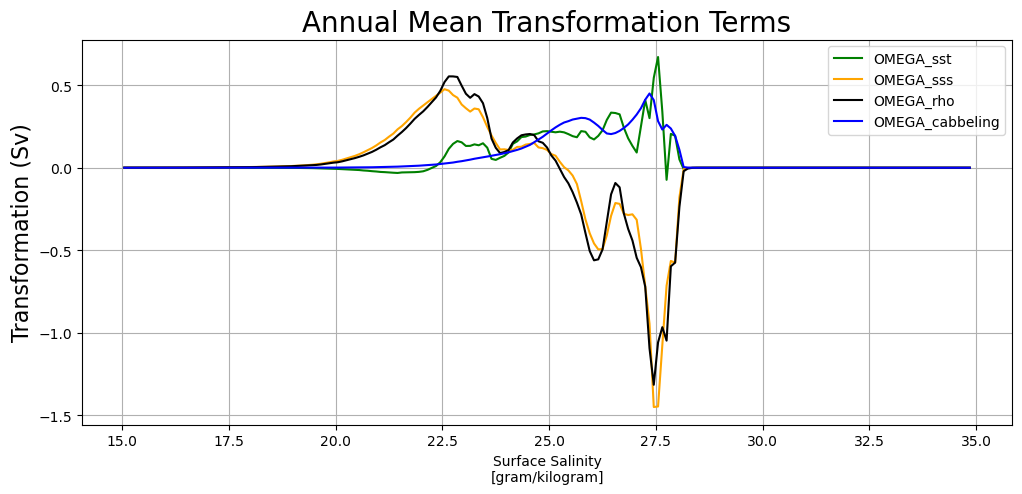

In [58]:
ann_mean2(natl)

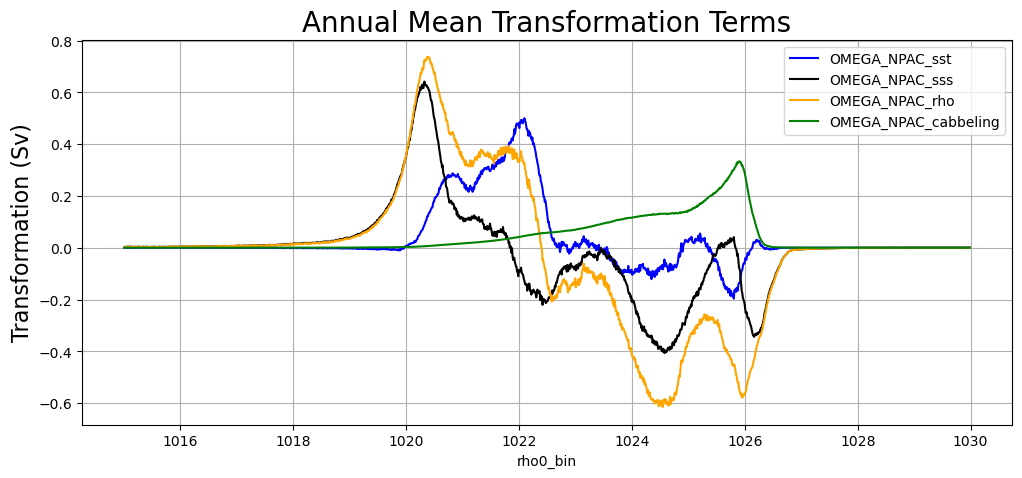

In [42]:
ann_mean2(npac_histograms)

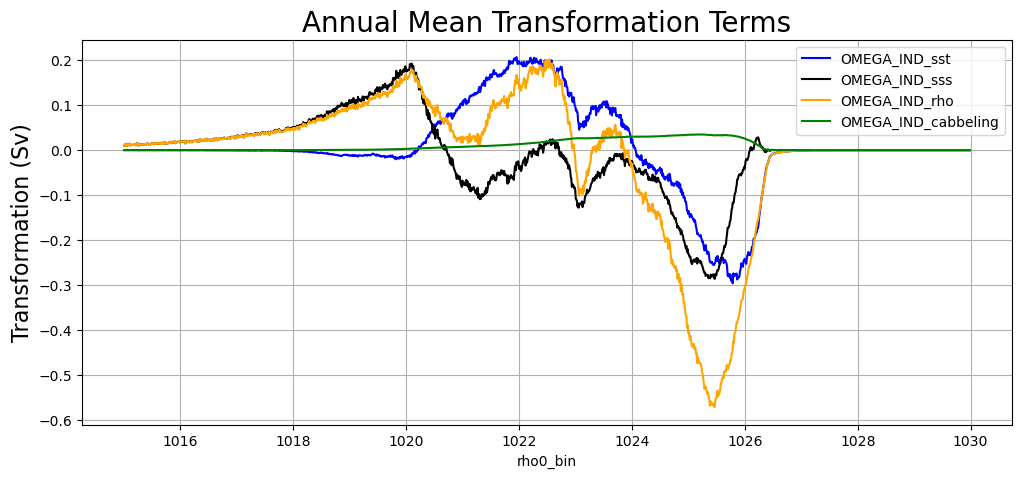

In [43]:
ann_mean2(ind_histograms)

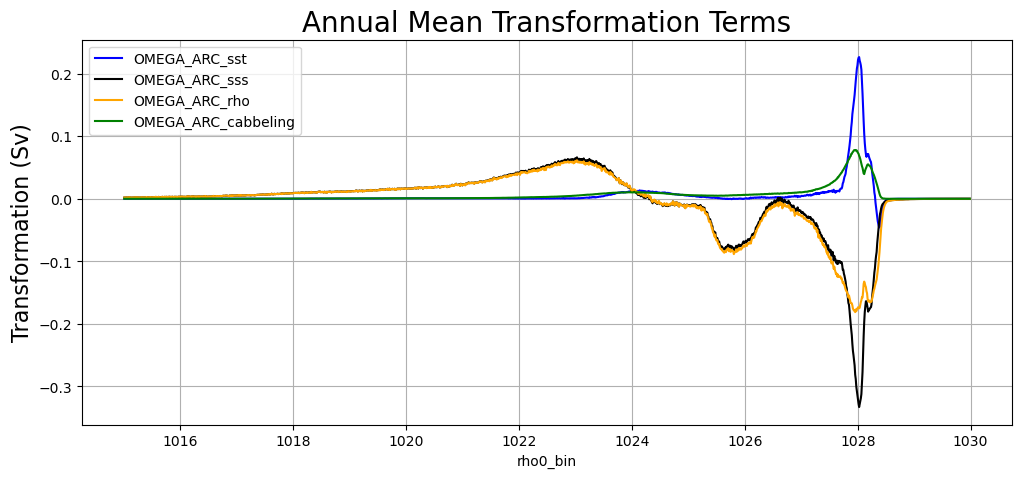

In [44]:
ann_mean2(arc_histograms)

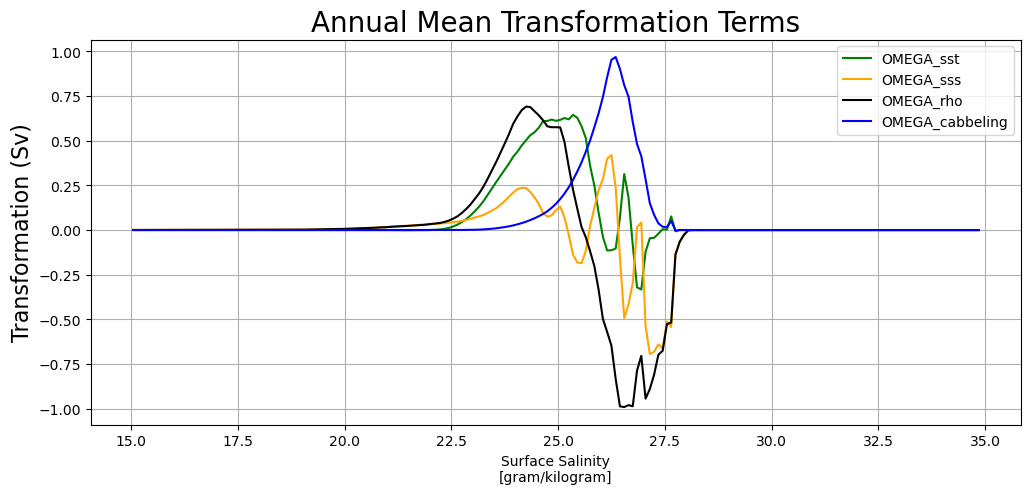

In [59]:
ann_mean2(south)

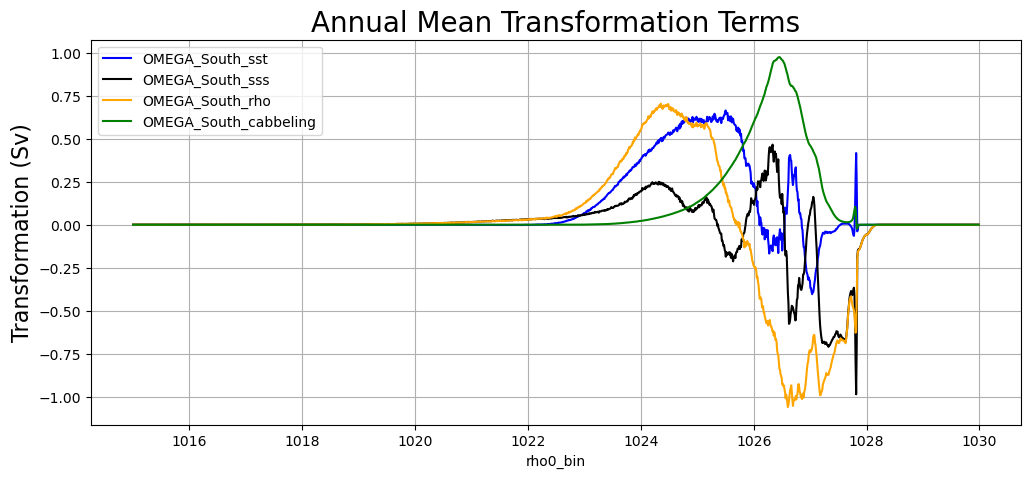

2023-02-08 20:13:41,139 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [45]:
ann_mean2(south_histograms)

# FiGS end

In [ ]:
def to_zarr_split(ds, mapper, split_dim="time", split_interval=1):
    print(f"Writing to {mapper.root} ...")

    n = len(ds[split_dim])
    splits = list(range(0, n, split_interval))

    # Make sure the last item in the list covers the full length
    # of the time on our dataset
    if splits[-1] != n:
        splits = splits + [n]

    split_datasets = []
    for ii in range(len(splits) - 1):
        start = splits[ii]
        stop = splits[ii + 1]
        split_datasets.append(ds.isel({split_dim: slice(start, stop)}))

    # write the first array
    # TODO: move the first write to the loop so it is counted in the viz bar
    split_datasets[0].to_zarr(mapper)
    for ds_split in tqdm(split_datasets[1:None]):
        ds_split.to_zarr(mapper, append_dim=split_dim)

    # overwrite the split dimension as single chunk (this should reproduce
    # what xr.to_zarr would do
    g = zarr.open_group(mapper)
    del g[split_dim]
    
    ds[[split_dim]].load().to_zarr(mapper, mode='a')
    zarr.consolidate_metadata(mapper)

In [30]:
#saving north atlantic basin histograms
gcsmap_hist_natl = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/avg-mld/natl_histograms.zarr')
natl_histograms.to_zarr(gcsmap_hist_natl, mode='w')

KilledWorker: Attempted to run task ('where-getitem-getitem-1ee7a8e7487f6025964d78e3f51e6230', 7879, 0, 0) on 3 different workers, but all those workers died while running it. The last worker that attempt to run the task was tls://10.2.46.3:44827. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

In [31]:
client.restart()

<Client: 'tls://10.2.23.2:8786' processes=23 threads=46, memory=690.00 GiB>

In [ ]:
#saving north pacific basin histograms
gcsmap_hist_npac = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/avg-mld/npac_histograms.zarr')
npac_histograms.to_zarr(gcsmap_hist_npac, mode='w')

Task exception was never retrieved
future: <Task finished name='Task-15905' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2119> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2128, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-15906' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2119> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2128, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-15907' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/p

In [31]:
cluster.close()
client.close()

[Back to top](#top)